## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [0]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = Input(input_shape)
    for i , n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units= n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = Dense(units= n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)

    output = Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output])

    return model

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [22]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
earlystop10 = EarlyStopping(monitor='val_acc', patience=5, verbose=1)
earlystop25 = EarlyStopping(monitor='val_acc', patience=8, verbose=1)
earlystops = [earlystop10, earlystop25]
earlystopsName = ['earlystop5', 'earlystop8']
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i, earlystop in enumerate(earlystops):
    model = build_mlp(x_train.shape[1:])
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_data=(x_test,y_test),
              shuffle=True,
              callbacks=[earlystop]
              )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    results[earlystopsName[i]] ={'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2231 - acc: 0.2645 - val_loss: 2.0435 - val_acc: 0.3227
Epoch 2/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.7489 - acc: 0.3876 - val_loss: 1.7891 - val_acc: 0.3819
Epoch 3/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.6271 - acc: 0.4290 - val_loss: 1.6958 - val_acc: 0.4119
Epoch 4/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5547 - acc: 0.4550 - val_loss: 1.6266 - val_acc: 0.4329
Epoch 5/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5008 - acc: 0.4756 - val_loss: 1.5934 - val_acc: 0.4435
Epoch 6/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4555 - acc: 0.4906 - val_loss: 1.5787 - val_acc: 0.4526
Epoch 7/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4168 - acc: 0.5051 - val_loss: 1.5578 - val_acc

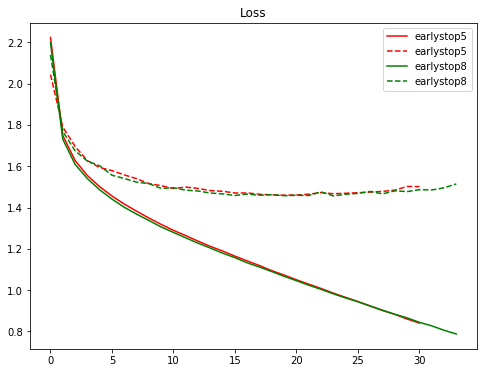

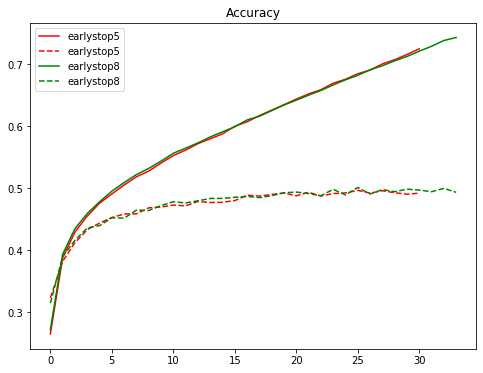

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
# plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()